In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Raices de funciones

---
### Profesor: Juan Marcos Marín
*Métodos Computacionales 2024-2*

---


En muchos problemas de la vida real, ya sea en la ingeniería, la física, la economía o las ciencias sociales, se nos presenta la necesidad de resolver ecuaciones para las cuales no siempre es posible obtener una solución exacta mediante métodos analíticos tradicionales. Por ejemplo, ecuaciones no lineales complejas o sistemas de ecuaciones que involucran múltiples variables pueden ser intratables por métodos algebraicos convencionales.




## Ejemplo

Consideremos la función cuadrática:

$$
f(x) = x^2 - 4
$$

### Paso 1: Graficar la función
Si graficamos la función $f(x) = x^2 - 4$, obtenemos una parábola que se abre hacia arriba, con su vértice en $(0, -4)$.

### Paso 2: Identificar visualmente las raíces
Las raíces de la función se encuentran en los puntos donde la gráfica corta el eje $x$. Para esta función, podemos ver que la gráfica cruza el eje $x$ en dos puntos:

$$
x = -2 \quad \text{y} \quad x = 2
$$

### Paso 3: Confirmar las raíces
Podemos confirmar que estos puntos son efectivamente las raíces resolviendo la ecuación $x^2 - 4 = 0$

$$
x^2 = 4 \quad \Rightarrow \quad x = \pm 2
$$

Así, las raíces de la función son $x = -2$ y $x = 2$, lo que coincide con los puntos donde la gráfica corta el eje $x$.


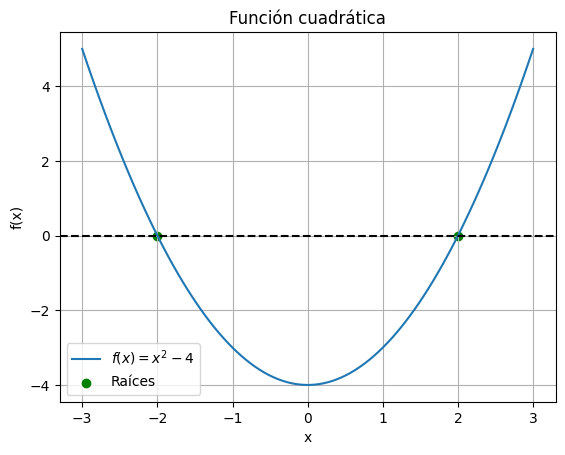

In [2]:
x = np.linspace(-3, 3, 100)
y = x**2 - 4

plt.plot(x, y, label='$f(x) = x^2 - 4$')
plt.axhline(0, color='black', linestyle='--')
plt.scatter([-2, 2], [0, 0], color='green', label='Raíces')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función cuadrática')
plt.grid(True)
plt.show()

## Ejemplo
Encontremos las raices para la ecuación

$$3\sin(x) + 9 = x^2 - \cos(x)$$

Los puntos donde las funciones se encuentran serán las denominadas raíces. Tomemos:

$$f_1(x) = 3\sin(x) + 9 $$

$$f_2(x) = x^2 - \cos(x)$$


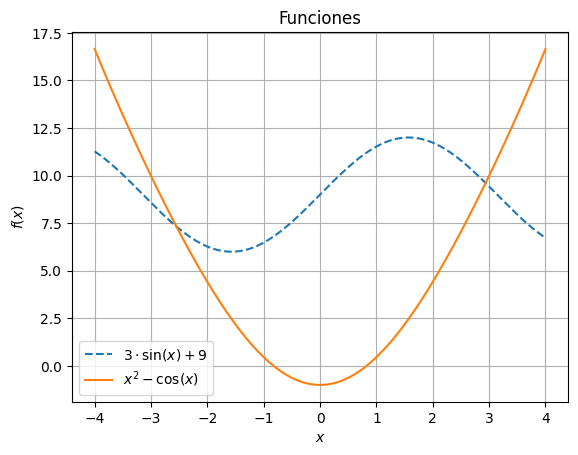

In [3]:
x = np.linspace(-4, 4, 100000)
f1 = lambda x: 3*np.sin(x) + 9
f2 = lambda x: x**2 - np.cos(x)

plt.plot(x, f1(x), '--', label='$3\cdot\sin(x) + 9$')
plt.plot(x, f2(x), label='$x^2 - \cos(x)$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Funciones')
plt.grid(True)
plt.show()

Analicemos la diferencia entre las funciones para tratar de encontrar cuando son cercanos a cero $f_1(x) - f_2(x) \approx 0$ esto es:

$$\left(3\sin(x) + 9\right) - \left(x^2 - \cos(x)\right) = 0$$

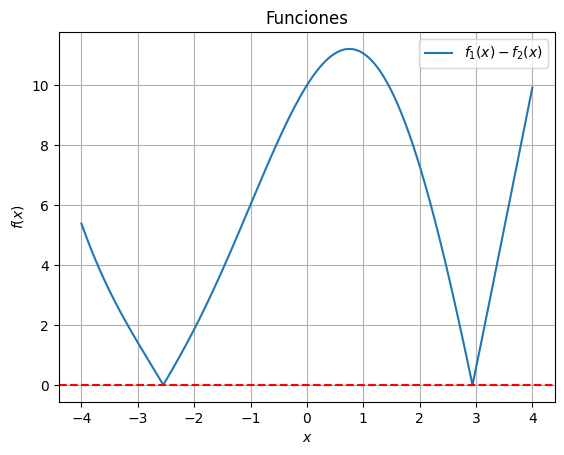

In [4]:
dif = f1(x) - f2(x)
plt.plot(x, abs(dif), label='$f_1(x) - f_2(x)$')
plt.axhline(0, color='red', linestyle='--')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Funciones')
plt.grid(True)

In [5]:
# Restar las funciones
diferencia = np.abs(f1(x) - f2(x))

tol = 0.0002
indices = np.where(diferencia < tol)

# Obtener los valores de x correspondientes
x_vals = x[indices]

# Mostrar los resultados
print("Los valores de x donde f1(x) y f2(x) son cercanas son:", x_vals)

# Evaluacion
res = abs(f1(x_vals) - f2(x_vals))
print(f'La evaluación de la raiz será igual a {res}')

Los valores de x donde f1(x) y f2(x) son cercanas son: [-2.54822548  2.93750938]
La evaluación de la raiz será igual a [1.69324757e-05 1.99871552e-04]


In [6]:
minimo = np.argmin(abs(f1(x) - f2(x)))
print(f'La raiz será {x[minimo]}')

La raiz será -2.5482254822548223


Veamos la solución usando `sympy`

In [7]:
# Definir la variable simbólica
x = sp.symbols('x')

# Definir las funciones f1 y f2
f1 = 3 * sp.sin(x) + 9
f2 = x**2 - sp.cos(x)

# Restar las funciones
diferencia = f1 - f2

# Encontrar raíces numéricas
# Es recomendable elegir valores iniciales basados en el comportamiento de las funciones
raiz1 = sp.nsolve(diferencia, x, -3)  # Valor inicial -3
raiz2 = sp.nsolve(diferencia, x, 2)   # Valor inicial 2

# Mostrar las raíces encontradas
print("Raíz numérica alrededor de -3:", raiz1)
print("Raíz numérica alrededor de 2:", raiz2)



Raíz numérica alrededor de -3: -2.54823082639754
Raíz numérica alrededor de 2: 2.93748720510786


# Teorema del Valor Medio

Sea $f$ una función que satisface las siguientes condiciones:

1. $f$ es continua en el intervalo cerrado $[a,b]$
2. $f$ es derivable en el intervalo abierto $(a,b)$

Entonces existe al menos un punto $c$ en el intervalo $(a,b)$ tal que:

$$ f'(c) = \frac{f(b) - f(a)}{b - a} $$


El teorema del valor medio establece que existe al menos un punto en la curva de $f$ donde la tangente es paralela a la línea secante que une los puntos $(a,f(a))$ y $(b,f(b))$.





# Método de la Bisección


El **Método de la Bisección** es un método numérico utilizado para encontrar raíces de funciones continuas. Se basa en el Teorema del Valor Intermedio, que establece que si una función es continua en un intervalo cerrado $[a, b]$ y cambia de signo, entonces existe al menos una raíz en ese intervalo.

![Biseccion](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Bisection_method.svg/800px-Bisection_method.svg.png)

### Pasos del Método de la Bisección

1. **Definir la función** $f(x)$ que queremos analizar y el intervalo $[a, b]$ tal que:
   - $f(a) \cdot f(b) < 0$ (la función tiene signos opuestos en los extremos del intervalo).

2. **Calcular el punto medio**:
   $$
   c = \frac{a + b}{2}
   $$

3. **Evaluar la función en el punto medio**:
   - Si $f(c) = 0$, entonces $c$ es la raíz.
   - Si $f(c) \cdot f(a) < 0$, entonces la raíz se encuentra en el intervalo $[a, c]$. Actualizar $b = c$.
   - Si $f(c) \cdot f(b) < 0$, entonces la raíz se encuentra en el intervalo $[c, b]$. Actualizar $a = c$.

4. **Repetir** los pasos 2 y 3 hasta que la precisión deseada sea alcanzada:
   $$
   f(c) < \epsilon
   $$
   donde $\epsilon$ es un valor pequeño que determina la precisión.

### Ejemplo

Consideremos la función $f(x) = x^2 - 4$ y busquemos la raíz en el intervalo $[0, 3]$:

1. $f(0) = -4$ y $f(3) = 5$ (cambio de signo).
2. Calcular $c$:
   $$
   c = \frac{0 + 3}{2} = 1.5
   $$
   $f(1.5) = 1.25$ (signo positivo).
3. Actualizar intervalo: $[0, 1.5]$.
4. Repetir hasta que $f(c)$ sea menor que $\epsilon$.



In [8]:
def biseccion_g(f, a, b, tol=1e-8, max_iter=100):
  i = 0
  while i < max_iter:
    c = (a + b)/2
    if f(a)*f(b) > 0:
      raise ValueError('No hay raiz en el intervalo')
    if abs(f(c)) < tol:
      return c
    elif f(c)*f(a) < 0:
      b = c
    else:
      a = c
    i += 1
  raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')

In [13]:
# Usando recursividad de funciones
def biseccion_r(f, a, b, tol=1e-8, max_iter=100):
  '''
  Funcion que implementa el metodo de biseccion para encontrar la raiz de una funcion continua
  f: funcion
  a: limite inferior
  b: limite superior
  tol: tolerancia (1e-6)
  max_iter: numero maximo de iteraciones (100)
  '''
  c = (a + b)/2
  iteraciones = 0
  while iteraciones < max_iter:
    iteraciones += 1
    if f(a)*f(b) >= 0:
      raise ValueError('No hay raiz en el intervalo')
    if abs(f(c)) < tol:
      return c
    elif f(c)*f(a) < 0:
      return biseccion_r(f, a, c, tol, max_iter)
    else:
      return biseccion_r(f, c, b, tol, max_iter)


In [10]:
def biseccion(f, a, b, tol=1e-8, max_iter=100):
    '''
    Función que implementa el método de bisección para encontrar la raíz de una función continua
    f: función
    a: límite inferior
    b: límite superior
    tol: tolerancia (1e-8)
    max_iter: número máximo de iteraciones (100)

    Retorna:
    x : aproximación de la raíz
    iteraciones : número de iteraciones realizadas
    errores : array con los errores en cada iteración
    """
    '''

    # Verificación inicial de cambio de signo
    if f(a) * f(b) >= 0:
        raise ValueError('No hay raíz en el intervalo dado o hay múltiples raíces')

    # Inicialización de variables
    iteraciones = np.arange(max_iter)
    errores = np.zeros(max_iter)  # Lista para almacenar errores absolutos
    i = 0  # Contador de iteraciones
    c_anterior = a  # Variable para almacenar el valor anterior de c

    while i < max_iter:
        # Calcular el punto medio
        c = (a + b) / 2

        # Calcular el error absoluto
        error_abs = abs(c - c_anterior)
        errores[i] = error_abs # Almacena los errores absolutos

        # Verificar si el valor de f(c) es suficientemente pequeño o el error es menor que la tolerancia
        if abs(f(c)) < tol:
            return c, iteraciones[:i], errores[:i]

        # Determinar el nuevo intervalo
        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

        # Actualizar el valor de c_anterior para el siguiente cálculo de error
        c_anterior = c

        # Incrementar el contador de iteraciones
        i += 1

    # Si no converge en el número máximo de iteraciones
    raise RuntimeError(f'No se encontró la raíz después de {max_iter} iteraciones')



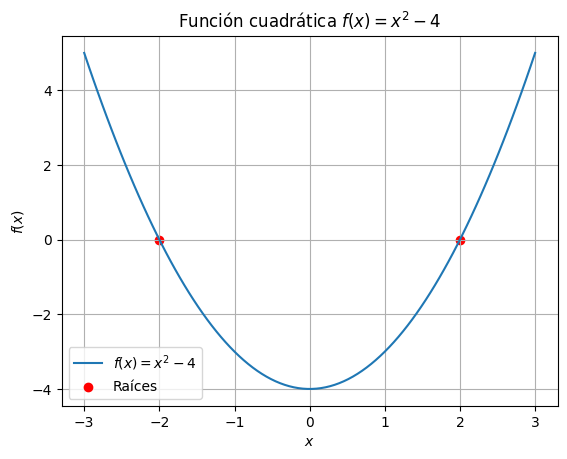

In [11]:
f = lambda x: x**2 - 4
x = np.linspace(-3, 3, 100)
x_1, iter_1, err_1 = biseccion(f, 0, 3)
x_2, iter_2, err_2 = biseccion(f, 0, -3)
plt.plot(x, f(x), label='$f(x) = x^2 - 4$')
plt.scatter([x_1, x_2], [f(x_1), f(x_2)], color='red', label='Raíces')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Función cuadrática $f(x) = x^2 - 4$')
plt.grid(True)
plt.show()

Las raices son -2.548230826854706 y 2.93748720549047


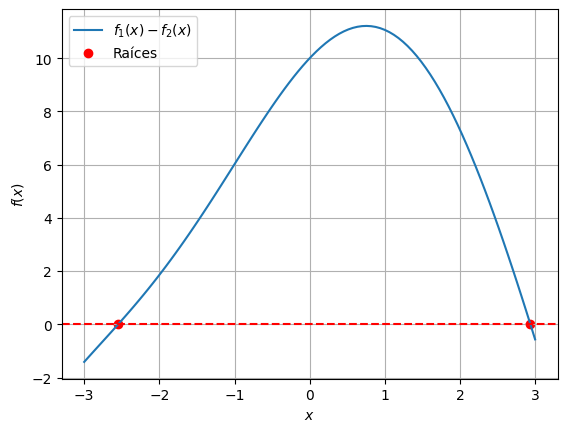

In [14]:
fd = lambda x: 3*np.sin(x) + 9 - (x**2 - np.cos(x))

x_1 = biseccion_r(fd, -3,-2)
x_2 = biseccion_r(fd, 2, 4)
plt.plot(x, fd(x), label='$f_1(x) - f_2(x)$')
plt.axhline(0, color='red', linestyle='--')
plt.scatter([x_1, x_2], [fd(x_1), fd(x_2)], color='red', label='Raíces')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
print(f'Las raices son {x_1} y {x_2}')

### Convergencia del Método de Bisección

- **Convergencia Lineal**: El método de bisección tiene una tasa de convergencia **lineal**, lo que significa que en cada iteración reduce el tamaño del intervalo que contiene la raíz a la mitad.

  Si $ I_n $ es la longitud del intervalo después de $ n $ iteraciones, entonces:
  $$
  I_{n+1} = \frac{I_n}{2}
  $$

  Esto implica que después de $ n $ iteraciones, la longitud del intervalo se puede expresar como:
  $$
  I_n = \frac{b - a}{2^n}
  $$

* **Estimación de Iteraciones**

El número de iteraciones $ n $ necesarias para que la longitud del intervalo sea menor que una tolerancia dada $\text{tol} $ se puede aproximar mediante la siguiente fórmula:
$$
n \geq \log_2\left(\frac{b - a}{\text{tol}}\right)
$$

Esto significa que aunque la convergencia del método es lineal, el uso del logaritmo permite estimar cuántas iteraciones se necesitan para alcanzar una tolerancia específica.




### Actividad
Examina la convergencia del método de bisección en funcón de los términos necesarios y el error absoluto para obtener $|f(c)|< ϵ$